In [ ]:
# croissance des crimes depuis le début des année 2000

In [360]:
import pandas as pd
import matplotlib.pyplot as plt
xl = pd.read_excel(open('./xlsx/crimes-delit.xlsx', 'rb'), sheet_name='France_Entière')

<AxesSubplot: ylabel='départements avec le plus de crimes depuis le début des années 2000'>

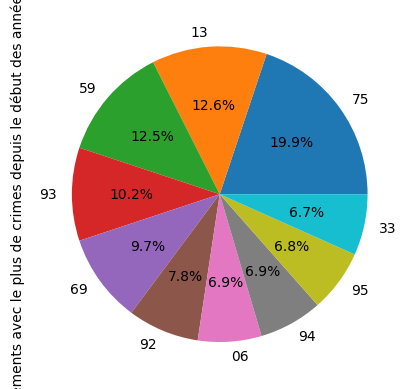

In [364]:
# les 10 départements avec le plus de crimes sur les 20 derniers années
tab = []

xl = pd.ExcelFile('./xlsx/crimes-delit.xlsx')
for sheet_name in xl.sheet_names:
    try:
        int(sheet_name)
    except(ValueError):
        continue
    xl = pd.read_excel(open('./xlsx/crimes-delit.xlsx', 'rb'), sheet_name=sheet_name)
    xl = xl.drop(['Index', 'libellé index'], axis=1)
    df = xl.sum(axis = 0, numeric_only=True).reset_index(name=sheet_name).set_index('index').transpose()
    tab.append(df)
df = pd.concat(tab)
df.columns = pd.to_datetime(df.columns, format='_%Y_%m')

all_crimes = df.sum(axis = 1, numeric_only=True)
top_10 = all_crimes.sort_values(ascending=False).head(10)
top_10.plot.pie(autopct='%1.1f%%', ylabel='départements avec le plus de crimes depuis le début des années 2000')

In [341]:
effectifs_polices = pd.read_excel(open('./effectifs_polices.xlsx', 'rb'))

In [157]:
def remove_first_0(number):
    return number[1:] if int(number[0]) == '0' else int(number)
cleaned_tab = effectifs_polices[effectifs_polices['MI/SG/DLPAJ/SDPA/BPA/2021'].astype(str).str.isdigit()]


<AxesSubplot: ylabel="10 départements avec le plus d'effectif police municipal">

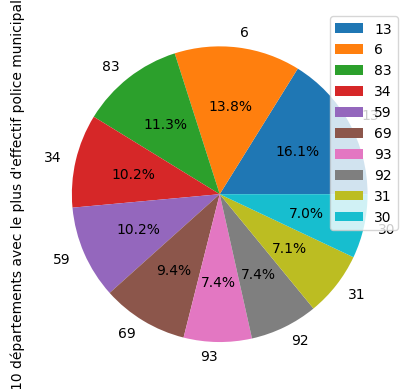

In [343]:
sum_effectifs_polices = cleaned_tab.groupby(['MI/SG/DLPAJ/SDPA/BPA/2021'])['Unnamed: 6'].sum().reset_index(name='counts')
sum_effectifs_polices.columns = ['numéro du département', 'Nombre d’agents de police municipale']
top = sum_effectifs_polices.sort_values(by='Nombre d’agents de police municipale', ascending=False).head(10).set_index('numéro du département')
top.plot.pie(autopct='%1.1f%%', ylabel='10 départements avec le plus d\'effectif police municipal', y='Nombre d’agents de police municipale')


/var/folders/dw/tbc1pbpn00s51dcj9nf620n40000gn/T/ipykernel_5596/316860222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_tab['Unnamed: 4'] = pd.to_numeric(cleaned_tab['Unnamed: 4'], errors='ignore')


<AxesSubplot: ylabel="10 départements avec le plus d'habitant">

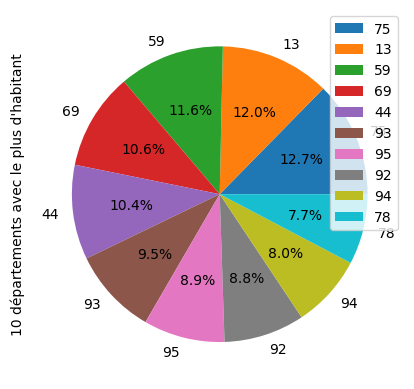

In [344]:
cleaned_tab['Unnamed: 4'] = pd.to_numeric(cleaned_tab['Unnamed: 4'], errors='ignore')
nb_habitant = cleaned_tab.groupby(['MI/SG/DLPAJ/SDPA/BPA/2021'])['Unnamed: 4'].sum().reset_index(name='counts')
nb_habitant.columns = ['numéro du département', 'Nombre d\'habitant']

top = nb_habitant.sort_values(by='Nombre d\'habitant', ascending=False).head(10).set_index('numéro du département')
top.plot.pie(autopct='%1.1f%%', ylabel='10 départements avec le plus d\'habitant', y='Nombre d\'habitant')
